#Titanik Yolcu Hayatta Kalma Analizi


In [ ]:
#gerekli kütüphaneler ekleme
import pandas as pd
import numpy as np

In [ ]:
#datasetleri yükleme
train = pd.read_csv("/content/train (1).csv")
test = pd.read_csv("/content/test (1).csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Veri Açıklaması
- PassengerId = Yolcunun Id değerini gösterir
- Survived: 0 = Hayatını kaybetmiş, 1 = Hayatta kalmış

- Pclass: Bilet sınıfı burada 1 = Birinci sınıf, 2 = İkinci sınıf, 3 = Üçüncü sınıf bu aynı zamanda sosyo-ekonomik sınıfın göstergesi olabilir.

- Sex: Erkek veya kadın

- Age: Yıl cinsinden yaş, 1'den küçükse kesirli
- SibSp: Titanikteki kardeş veya eş sayısı

- Parch: Titanikteki ebeveyn veya çocuk sayısı
- Ticket: Yolcu bilet numarası

- Fare: Yolcu ücreti

- Cabin: Kabin numarası

- Embarked:
Biniş noktası; C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#veri kümemizin boyutunu verir
train.shape, test.shape

((891, 12), (418, 11))

* _Unutmayın ki test veri seti, eğitim veri setinden bir sütun eksik, yani 'Survived' sütunu eksiktir. Bu, 'Survived' değişkenimizdir veya bazen hedef değişken olarak adlandırılır. Görevimiz, eğitim veri setindeki verileri analiz etmek ve test veri setindeki yolcuların hayatta kalma durumunu tahmin etmektir._





In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#benzersiz değerlerin sayısını verir
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
#boş değerlerin sayısını verir
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
import missingno

<Axes: >

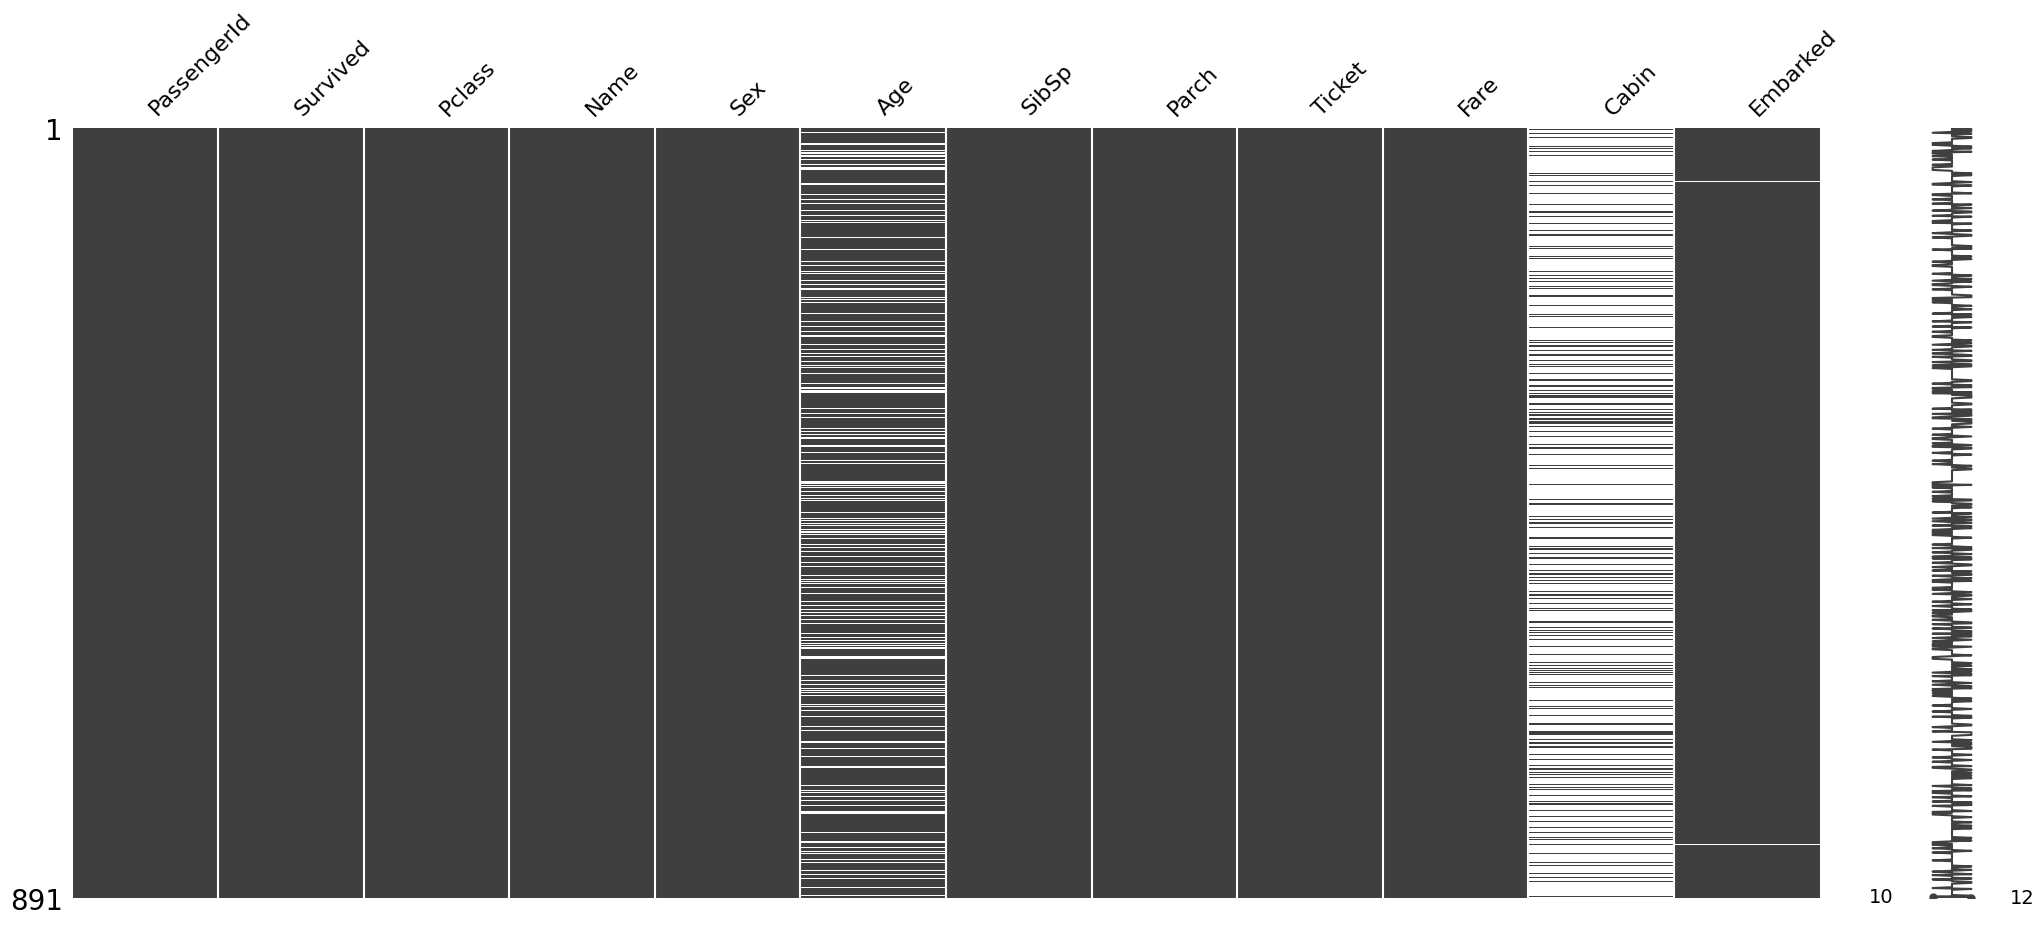

In [ ]:
missingno.matrix(train)


In [ ]:
#Kabin verisinin neredeyse %80'i eksik; kaldırılabilir, ancak daha fazla analiz yapılacak
#Yaş verilerinde eksik bilgiler de bulunuyor
#Test verisinde Embarked (bindiği liman) bilgisi eksik olan 2 satır bulunuyor
#PassengerID (Yolcu Kimlik Numarası), Ticket (Bilet Numarası) sadece referans numaralarıdır; kaldırılabilirler

In [ ]:
test.isnull().sum()
test["Survived"] = ""
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


In [ ]:
train.corr()

<ipython-input-16-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False) # Pclass sütunundaki değerlere göre olarak hayatta kalma oranı gösterilir.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

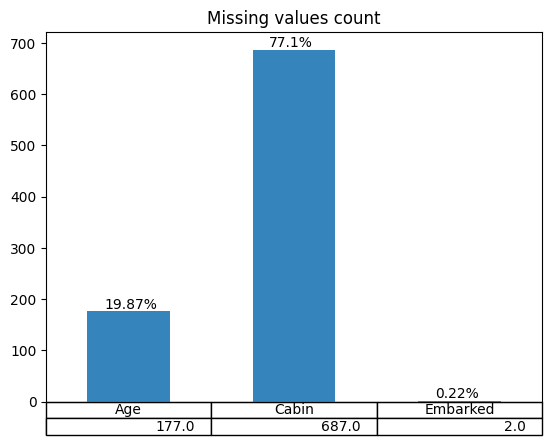

In [ ]:
#Kayıp değerler

# satırların sayısı
rows_length = train.shape[0]
#eksik değer sayısına sahip alanlar
fields_with_nan_length = train.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


#her çubuğun üstüne yüzde yaz
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')


<Axes: xlabel='Sex'>

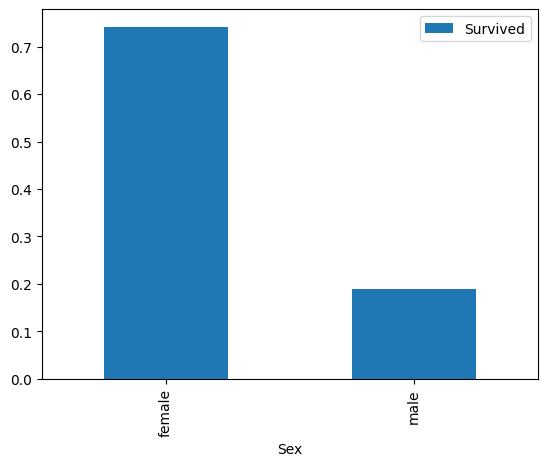

In [ ]:

survived_by_sex = train[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

* _Yaş, kabin ve bindiği liman (embarked) eksik değerlere sahip olan alanlardır:_
  * _Kabin, bilgi açısından çok yüksek bir eksiklik oranı olan %77'den fazla olduğu için muhtemelen çıkarılacaktır._
  * _Yaş verisi eksik değerlerin nasıl doldurulacağına dair bir yönteme ihtiyaç duyar._
  * _Bindiği liman (embarked) ise sadece 2 eksik giriş içerdiği için gerçekten bir sorun oluşturmamaktadır._


##Matplotlib ve Seaborn Kütüphanelerini Kullanarak Veri Görselleştirme.

In [ ]:
import matplotlib.pyplot as plt #grafikler için
%matplotlib inline
import seaborn as sns
import matplotlib

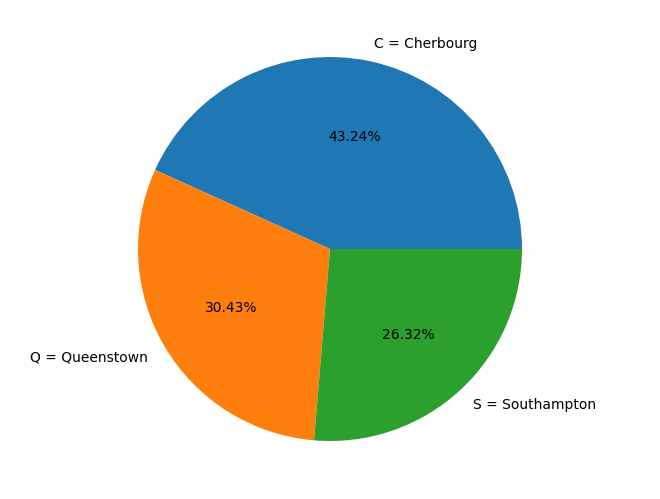

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

##Kategorik Özellikler için Çubuk Grafiği

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print('Cinsiyete göre ölenlerin yüzdesi: ')
print(train['Survived'].value_counts(normalize=True) * 100)

Cinsiyete göre ölenlerin yüzdesi: 
0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [ ]:
def percentage_calc(df, by, agg):
    temp = df.groupby([by])[agg].transform('sum')
    pct = round((df[agg]/temp) * 100, 2).astype('str') + '%'
    return pct

def create_group(df, grp_cols, agg_func='count', temp = 'PassengerId'):
    df_grp = df.groupby(grp_cols).aggregate({temp: agg_func}).reset_index()
    grp_cols.append('Agg')
    df_grp.columns = grp_cols
    return df_grp

In [ ]:
train_sex_grp = create_group(train, ['Sex', 'Survived'])
train_sex_grp['PCT'] = percentage_calc(train_sex_grp, 'Sex', 'Agg')

train_sex_grp

,Sex,Survived,Agg,PCT
0,female,0,81,25.8%
1,female,1,233,74.2%
2,male,0,468,81.11%
3,male,1,109,18.89%


In [ ]:
train_class_grp = create_group(train, ['Pclass', 'Survived', 'Sex'])
train_class_grp['PCT'] = percentage_calc(train_class_grp, 'Pclass', 'Agg')

train_class_grp

,Pclass,Survived,Sex,Agg,PCT
0,1,0,female,3,1.39%
1,1,0,male,77,35.65%
2,1,1,female,91,42.13%
3,1,1,male,45,20.83%
4,2,0,female,6,3.26%
5,2,0,male,91,49.46%
6,2,1,female,70,38.04%
7,2,1,male,17,9.24%
8,3,0,female,72,14.66%
9,3,0,male,300,61.1%


* _Ölen bireylerin çoğu alt sınıftan - tüm ölümlerin %25'i._
* _Hayatta kalan yolcuların %60'ından fazlası üst sınıftan binmiş._
* _Üst sınıftan hayatta kalanların %40'ından fazlası kadın._
* _Benzer bir eğilim orta sınıf için de görülüyor; hayatta kalan yolcuların neredeyse %40'ı kadın._
* _Düşük sınıfta bile, hayatta kalan yolcuların neredeyse %15'i kadın._
* _Bu nedenle, kadın olmak ve Pclass 1 ve 2'den birine binmek hayatta kalma yüzdesini önemli ölçüde artırır._


In [ ]:
train_emb_grp = create_group(train, ['Embarked', 'Survived', 'Sex', 'Pclass'])
train_emb_grp['PCT'] = percentage_calc(train_emb_grp, 'Embarked', 'Agg')

train_emb_grp

,Embarked,Survived,Sex,Pclass,Agg,PCT
0,C,0,female,1,1,0.6%
1,C,0,female,3,8,4.76%
2,C,0,male,1,25,14.88%
3,C,0,male,2,8,4.76%
4,C,0,male,3,33,19.64%
5,C,1,female,1,42,25.0%
6,C,1,female,2,7,4.17%
7,C,1,female,3,15,8.93%
8,C,1,male,1,17,10.12%
9,C,1,male,2,2,1.19%


* _**Cherbourg**_
  * _Cherbourg'dan binen yolcular arasında yaklaşık %5'i kadın yolcu hayatını kaybederken, neredeyse %40'ı erkek olanlar kazada hayatını kaybetti._
  * _Bir kadın üst sınıf yolcu ise hayatta kalma şansını artırırken, aynı durum erkekler için geçerli değil - hayatını kaybeden erkeklerin neredeyse %15'i üst sınıftan._
  * _Orta sınıf bölümünden tüm kadın yolcular kurtuldu._

* _**Queensland**_
  * _Queensland'dan yolculuğa başlayan üst veya orta sınıf bölümünden hiçbir kadın hayatını kaybetmedi._
  * _Alt sınıf erkekleri sayıca fazla öldü - %30'dan fazla, ancak alt sınıf kadınlarının neredeyse %45'i hayatta kaldı._

* _**Southampton**_
  * _Erkek yolcular büyük sayıda hayatını kaybetti, yaklaşık %36'sı alt sınıftan, ancak üst sınıf bireylerden çok azı hayatını kaybetti._
  * _Southampton'dan yolculuğa başlayan alt sınıftan 347 erkek yolcu vardı, yani toplam yolcuların neredeyse %40'ı._
  * _Alt sınıf bölümünden olan erkekler için ölüm olasılığı önemli ölçüde yükseldi._


In [ ]:
df_cabin = train.copy()

cabins = df_cabin['Cabin']
df_cabin['Cabin_Series'] = [str(cabin)[0] for cabin in cabins]

df_cabin_surv = df_cabin.loc[df_cabin['Survived'] == 1][['Cabin_Series', 'Pclass']]

print(df_cabin_surv['Cabin_Series'].value_counts(normalize=True))


n    0.602339
C    0.102339
B    0.102339
D    0.073099
E    0.070175
F    0.023392
A    0.020468
G    0.005848
Name: Cabin_Series, dtype: float64


In [ ]:
df_cabin_class = create_group(df_cabin, ['Cabin_Series', 'Pclass', 'Sex'])
df_cabin_class

,Cabin_Series,Pclass,Sex,Agg
0,A,1,female,1
1,A,1,male,14
2,B,1,female,27
3,B,1,male,20
4,C,1,female,27
5,C,1,male,32
6,D,1,female,16
7,D,1,male,13
8,D,2,female,2
9,D,2,male,2


* _Neredeyse tüm boş kabin bilgileri erkeklere ve alt sınıfa ait olanlara ait. Bu, kabin bilgisi olmayan bireylerin özel bir kabinleri olmadığı anlamına mı gelir?_
* _Kabin bilgisi olmayan bireyler arasında kadın sayısı daha azdır. Varsayarsak ki önceki nokta doğruysa, bu durumun kadınların erkeklere göre daha yüksek hayatta kalma oranlarına bir gösterge olup olmadığı düşünülebilir mi?_
* _Kabin olmaksızın hayatta kalma şansını azaltır._
* _Bir seri düşük hayatta kalma yüzdesine sahiptir - daha az kadın sayısı._
* _Belki de kabin sahibi olup olmama durumu için bir bayrak (evet/hayır) ayarlayabiliriz._


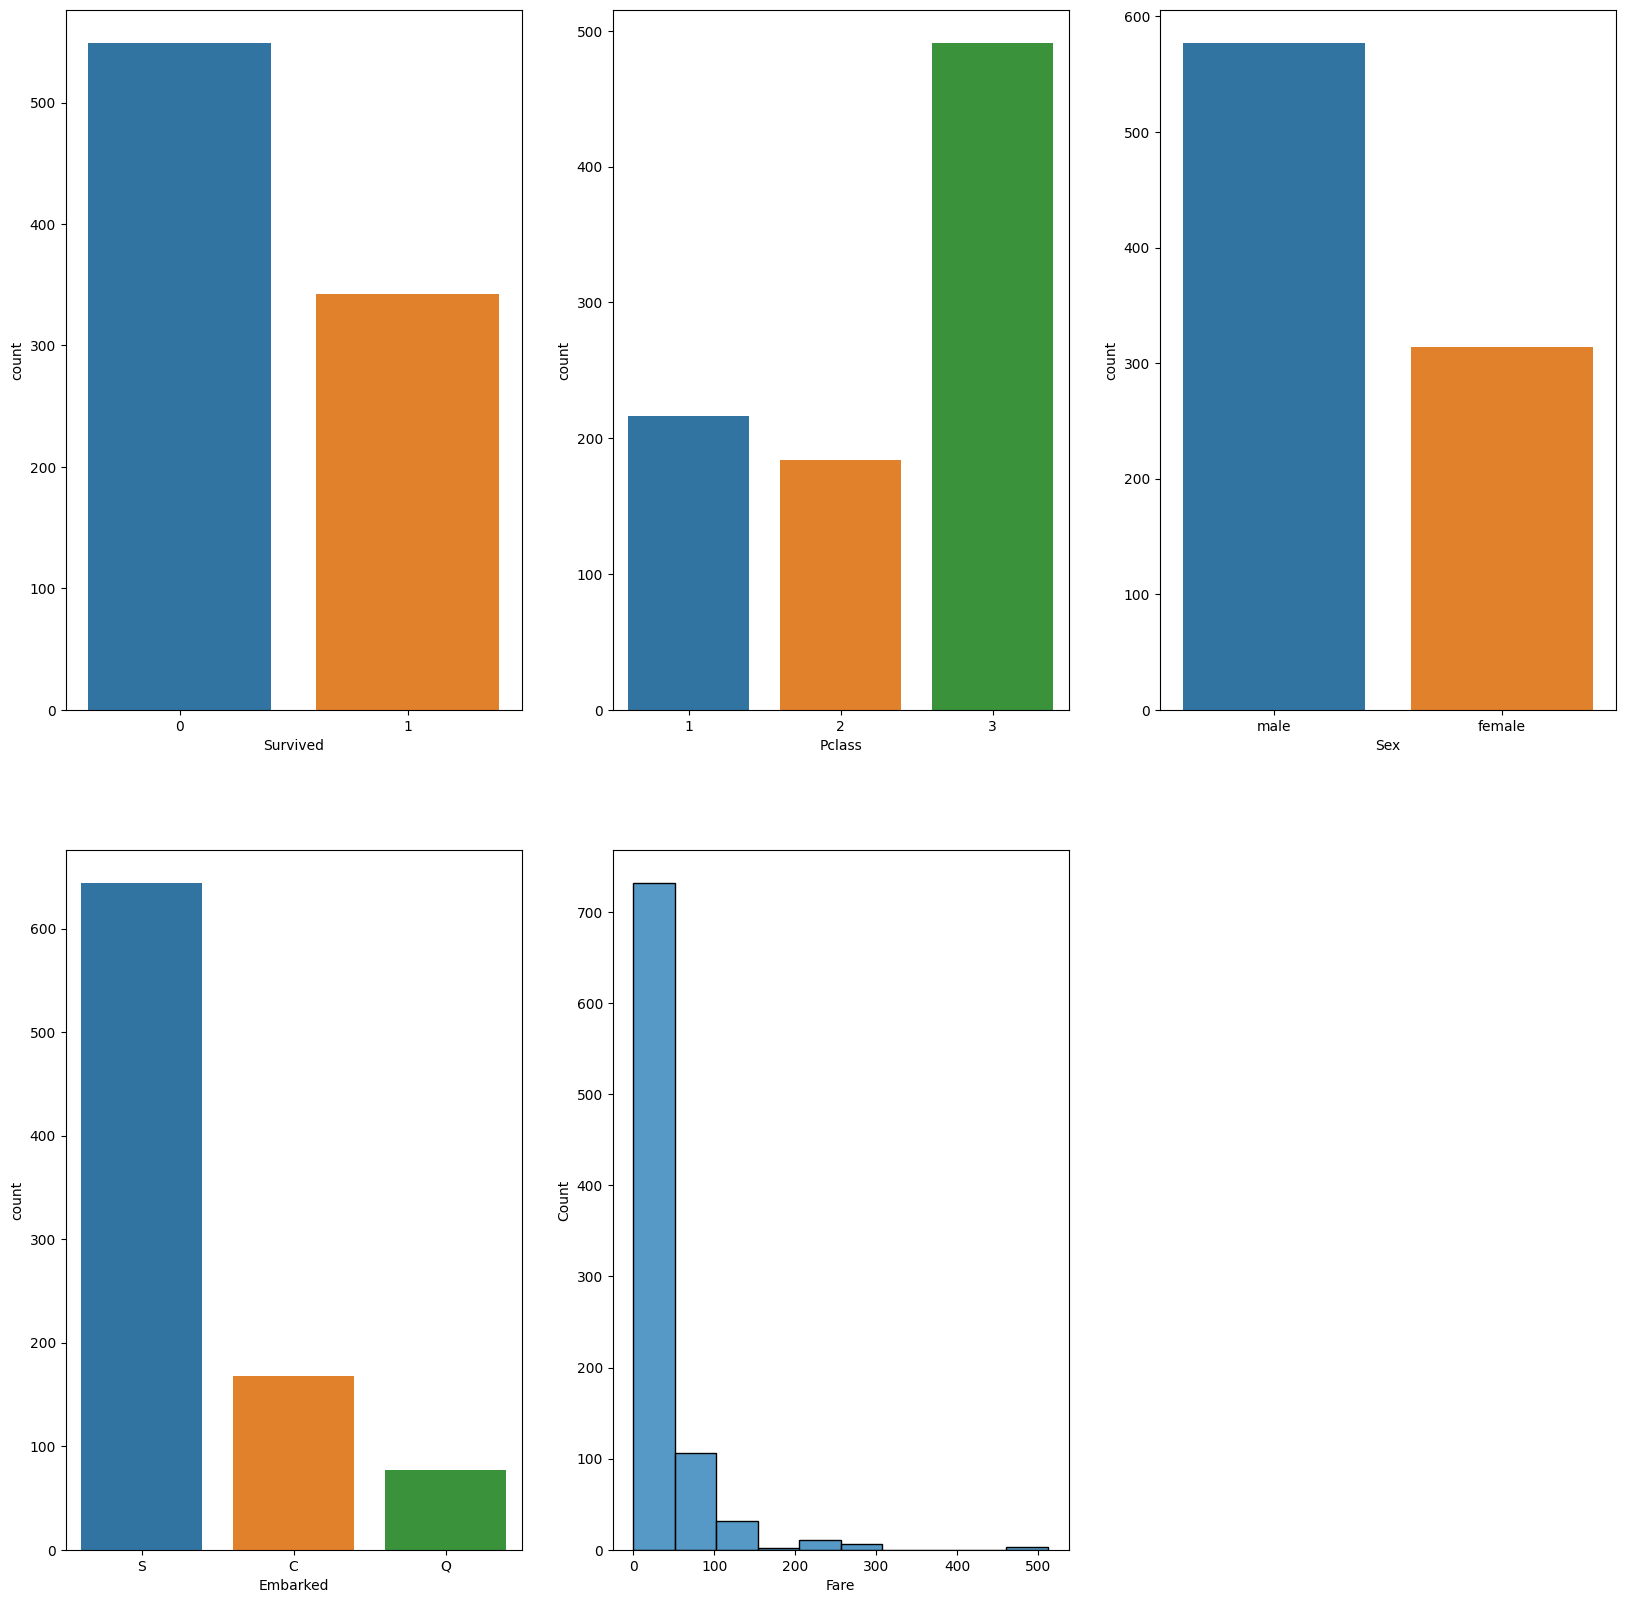

In [ ]:


# 2x3'lük bir alt grafik düzeni oluşturur
fig, ax = plt.subplots(2, 3, figsize=(20, 20))

# Grafikleri yerleştirir
sns.countplot(x='Survived', data=train, ax=ax[0, 0])
sns.countplot(x='Pclass', data=train, ax=ax[0, 1])
sns.countplot(x='Sex', data=train, ax=ax[0, 2])
sns.countplot(x='Embarked', data=train, ax=ax[1, 0])
sns.histplot(x='Fare', data=train, bins=10, ax=ax[1, 1])
sns.countplot(x='SibSp', data=train, ax=ax[1, 2])

# Boş olan son alt grafik bölgesini kaldırır
fig.delaxes(ax[1, 2])

# Grafikleri görüntüler
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

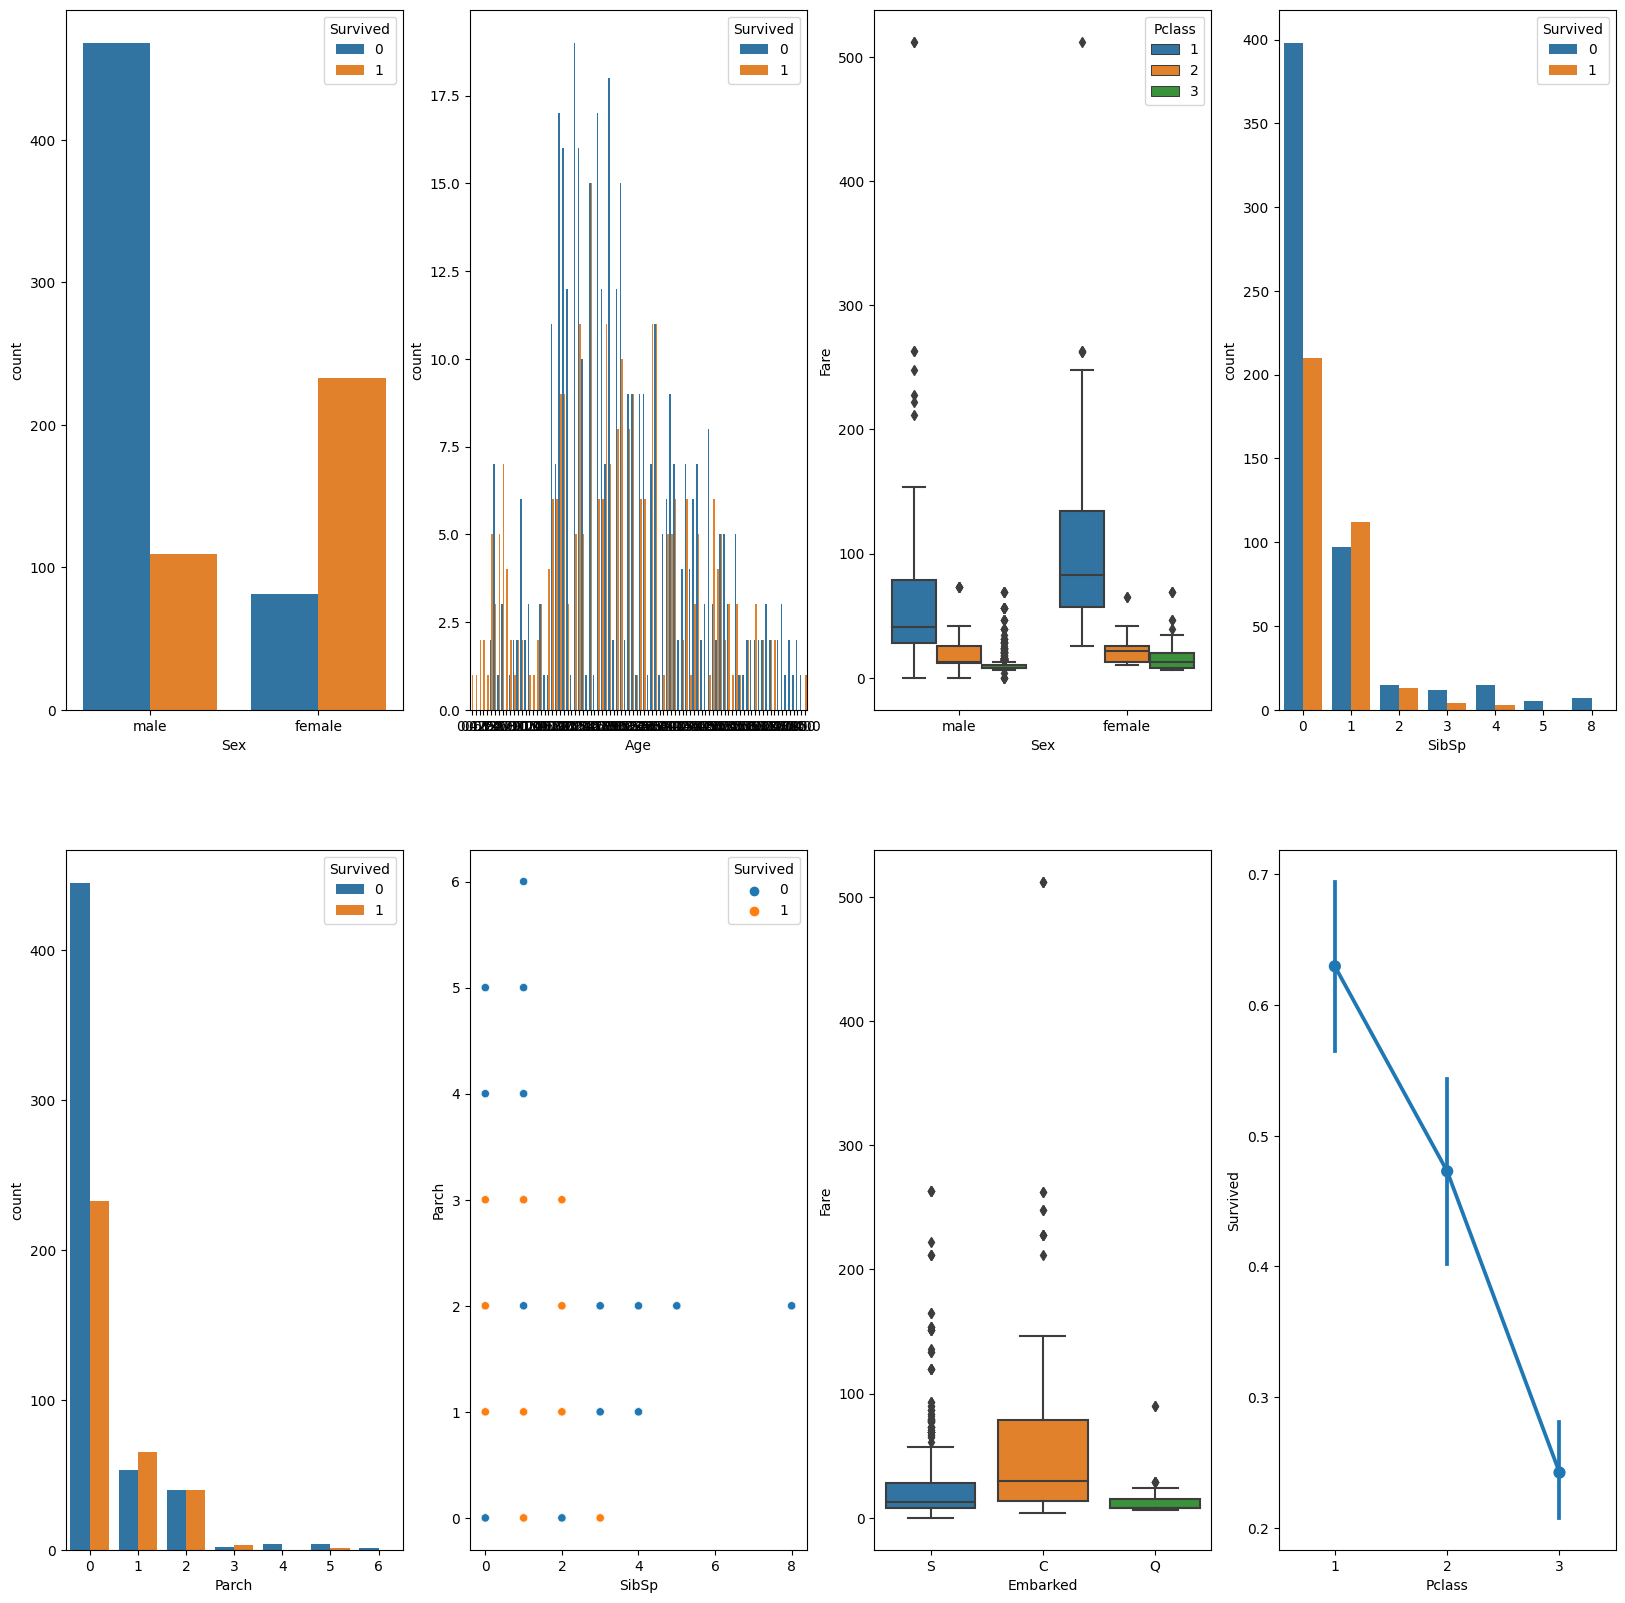

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = train, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = train, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = train, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = train, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = train, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = train,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = train, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = train, ax=ax[1,3])

In [ ]:
train['Fare'].isnull().sum()


0

In [ ]:
def bar_chart(feature):
    hayatta = train[train['Survived']==1][feature].value_counts()
    olmus = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([hayatta,olmus])
    df.index = ['Hayatta','Ölmüş']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Hayatta :
 female    233
male      109
Name: Sex, dtype: int64
Ölmüş:
 male      468
female     81
Name: Sex, dtype: int64


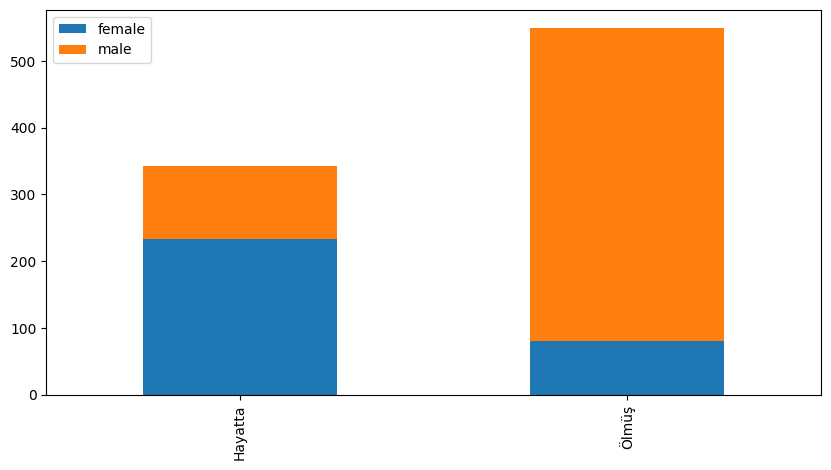

In [ ]:
bar_chart('Sex')
print("Hayatta :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Ölmüş:\n",train[train['Survived']==0]['Sex'].value_counts())

###Tablo, **kadınların hayatta kalma olasılığının erkeklere göre daha yüksek olduğunu** doğruluyor.

Hayatta :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Ölmüş:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


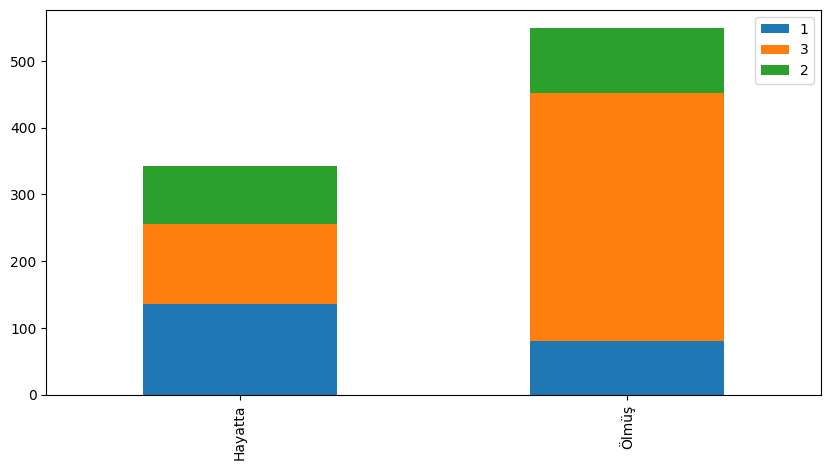

In [ ]:
bar_chart('Pclass')
print("Hayatta :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Ölmüş:\n",train[train['Survived']==0]['Pclass'].value_counts())

###Tablo, **1. sınıfın** hayatta kalma ihtimalinin **diğer sınıflara** göre daha yüksek olduğunu doğruluyor.Tablo, **3'üncü sınıfın** ölü olma ihtimalinin **diğer sınıflara** göre daha yüksek olduğunu doğruluyor

Hayatta :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Ölmüş:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


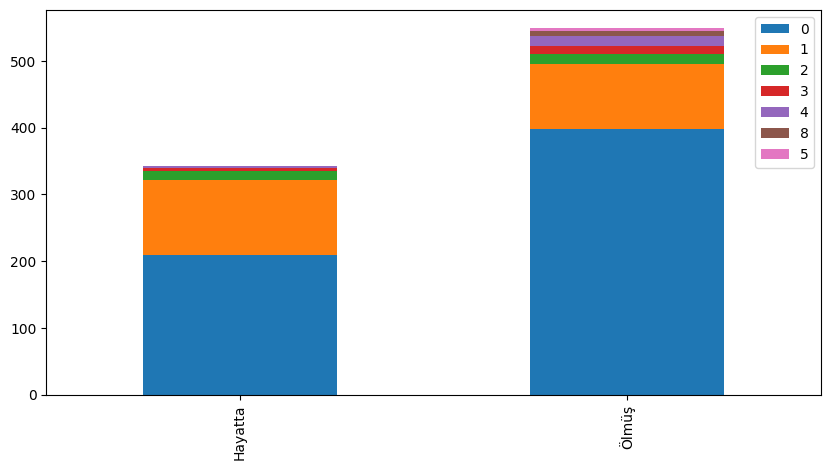

In [ ]:
bar_chart('SibSp')
print("Hayatta :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Ölmüş:\n",train[train['Survived']==0]['SibSp'].value_counts())

###Grafik, **2'den fazla kardeşi veya eşi** olan bir kişinin **hayatta kalma olasılığını daha yüksek** onaylıyor.Grafik, **kardeş veya eşi olmayan** bir kişinin **ölme olasılığının daha yüksek** olduğunu doğruluyor.

Hayatta :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Ölmüş:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


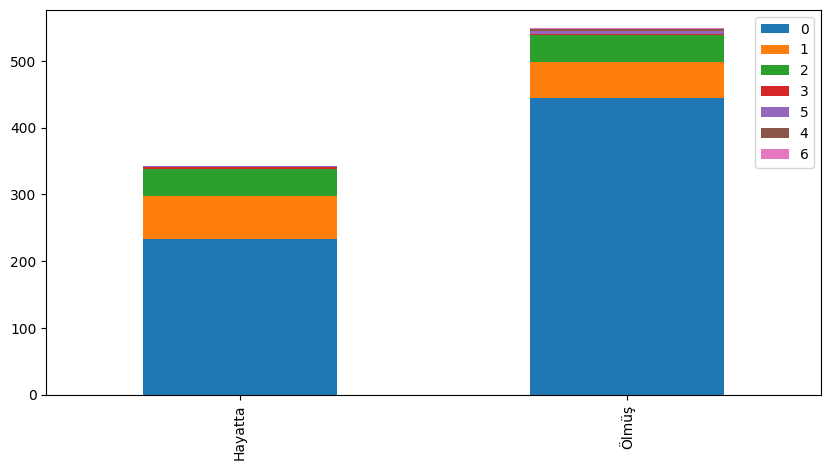

In [ ]:
bar_chart('Parch')
print("Hayatta :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Ölmüş:\n",train[train['Survived']==0]['Parch'].value_counts())

###Grafik, **2'den fazla ebeveyn veya çocuğu** olan bir kişinin **hayatta kalma olasılığını daha yüksek** onaylıyor.Grafik, **yalnız başına seyahat eden** bir kişinin **ölme olasılığının daha yüksek** olduğunu doğruluyor.

Hayatta :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Ölmüş:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


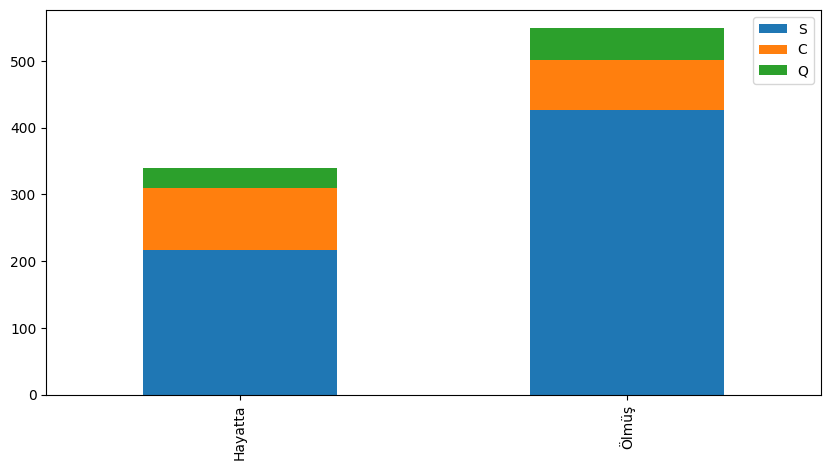

In [ ]:

bar_chart('Embarked')
print("Hayatta :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Ölmüş:\n",train[train['Survived']==0]['Embarked'].value_counts())

###Grafik, **C'den biniş yapan** bir kişinin hayatta kalma olasılığını biraz daha yüksek onaylıyor.
###Grafik, **Q'dan biniş yapan** bir kişinin ölme olasılığının daha yüksek olduğunu doğruluyor.
###Grafik, **S'den biniş yapan** bir kişinin ölme olasılığının daha yüksek olduğunu doğruluyor.

<ipython-input-42-d3bcf4a68d96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot= True)


<Axes: >

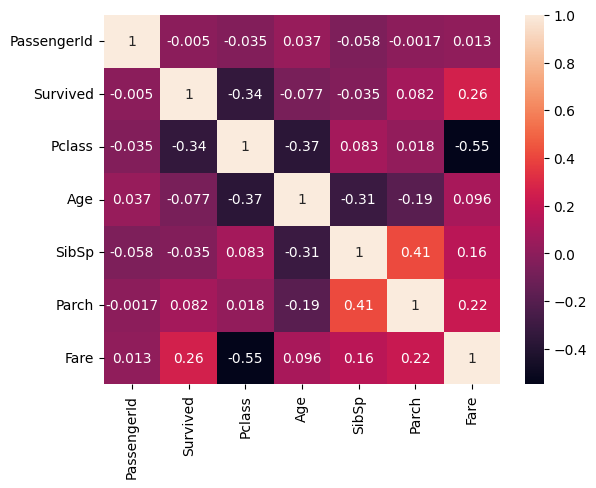

In [ ]:
sns.heatmap(train.corr(), annot= True)

###Feature Engineering (özellik mühendisliği)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_test_data = [train,test] #datasetleri birleştir

for dataset in train_test_data:
    dataset['Unvan'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
train['Unvan'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Unvan, dtype: int64

In [ ]:
train.shape

(891, 13)

In [ ]:
test['Unvan'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Unvan, dtype: int64

####**Unvan Bilgisi**
#####Mr : 0
#####Miss : 1
#####Mrs: 2
#####Others: 3

In [ ]:
unvan_bilgisi = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Unvan'] = dataset["Unvan"].map(unvan_bilgisi)

In [ ]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Unvan
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


In [ ]:
train.shape

(891, 13)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Unvan
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


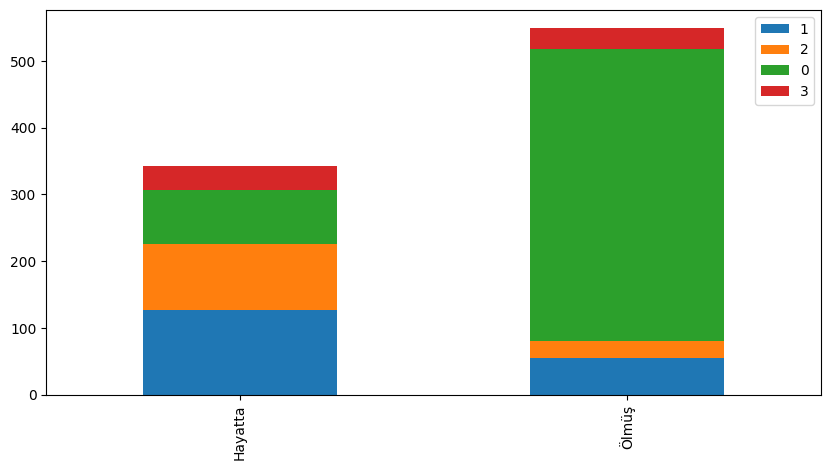

In [ ]:
bar_chart('Unvan')

In [ ]:
#gereksiz sütunu datasetten sil
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
cinsiyet_bilgisi = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(cinsiyet_bilgisi)

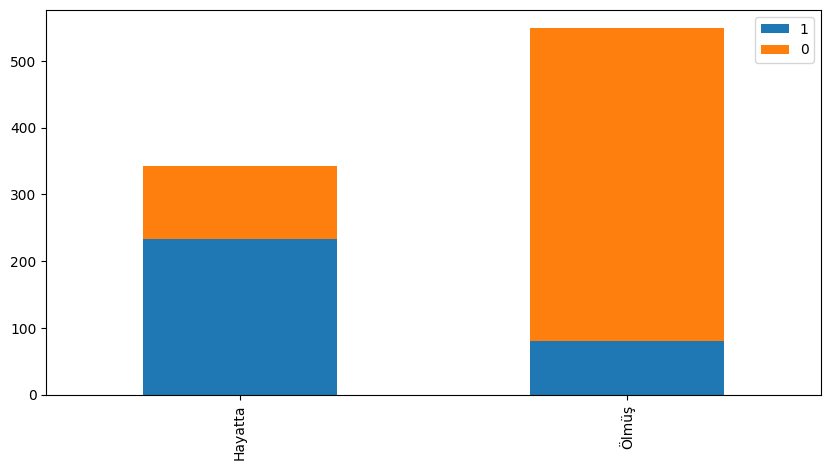

In [ ]:
bar_chart('Sex')

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Unvan
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,,2


In [ ]:
train.shape

(891, 12)

In [ ]:
train["Age"].fillna(train.groupby("Unvan")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Unvan')['Age'].transform("median"), inplace= True)

In [ ]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unvan
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train.shape

(891, 12)

In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4








In [ ]:
train.shape

(891, 12)

###"**20 ila 30** yaşlarındakiler daha **fazla ölü ve daha fazla hayatta** kalanlar arasındaydı."

In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Unvan        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unvan
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


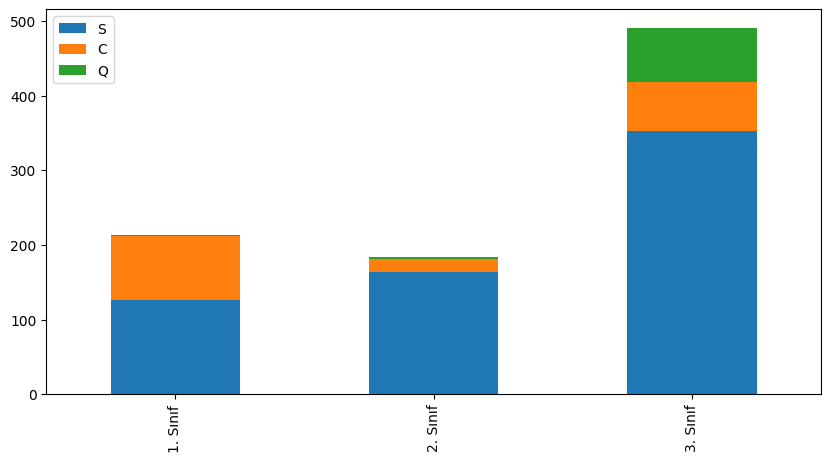

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [ ]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1. Sınıf','2. Sınıf','3. Sınıf']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

#####Birinci sınıftan olanların %50'den fazlası S limanından geliyor.
#####İkinci sınıftan olanların %50'den fazlası S limanından geliyor.
#####Üçüncü sınıftan olanların %50'den fazlası S limanından geliyor.
#####**Bu sebeple eksik liman bilgisini S limanıyla doldur.**

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unvan
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
liman_bilgisi = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(liman_bilgisi)

In [ ]:
#Eksik ücret bilgisini her bir Pclass (yolcu sınıfı) için median ücretle doldur
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unvan
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [ ]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0;
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1;
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2;
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unvan
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [ ]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

<Axes: >

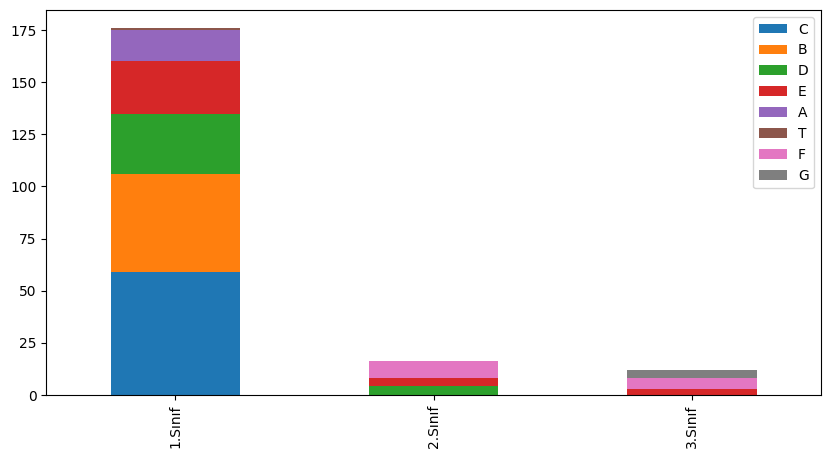

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1.Sınıf','2.Sınıf', '3.Sınıf']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
kabin_bilgisi= {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(kabin_bilgisi)


In [ ]:
#Eksik ücret bilgisini her bir Pclass (yolcu sınıfı) için medyan ücretle doldur.
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

######**Aile Büyüklüğü**

In [ ]:

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
#dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unvan,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [ ]:
silinecek_özellikler = ['Ticket','SibSp','Parch']
train = train.drop(silinecek_özellikler, axis = 1)
test = test.drop(silinecek_özellikler,axis=1)
train = train.drop(['PassengerId'], axis=1)

In [ ]:
train_data = train.drop('Survived', axis = 1)
hedef = train['Survived']
train_data.shape, hedef.shape

((891, 8), (891,))

In [ ]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Unvan,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


##Modelleme


In [ ]:
# Sınıflandırma Kütüphanelerini Ekle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Unvan       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


###Cross Validation(k-fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, hedef, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.7752809  0.82022472 0.83146067 0.85393258 0.83146067
 0.82022472 0.80898876 0.83146067 0.80898876]


In [ ]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, hedef, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 81.93
Score of Model 1 : 79.58
Score of Model 2 : 80.59
Score of Model 3 : 78.78
Score of Model 4 : 83.5
Score of Model 5 : 79.13
Score of Model 6 : 81.25
Score of Model 7 : 81.03
Score of Model 8 : 81.03


In [ ]:
y = train['Survived']
x = train.drop(columns=['Survived'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [ ]:
lr.fit(x,y)
lr.score(x,y)

0.8215488215488216

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [ ]:
dtree.fit(x,y)
dtree.score(x,y)

0.9001122334455668

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [ ]:
svm.fit(x,y)
svm.score(x,y)

0.8383838383838383

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
knn.fit(x,y)
knn.score(x,y)


0.8574635241301908